In [12]:
! gsutil -m rsync gs://acmiyaguchi/pinecube/captures_v2 ../data/captures_v2

Building synchronization state...
Starting synchronization...


In [36]:
from pathlib import Path
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, draw, exposure, feature, transform
from skimage.util import img_as_ubyte, img_as_float
from datetime import datetime

In [75]:
paths = sorted(Path("../data/captures_v2").glob("*.jpeg"))
paths[:5]

[WindowsPath('../data/captures_v2/202109090100.jpeg'),
 WindowsPath('../data/captures_v2/202109090200.jpeg'),
 WindowsPath('../data/captures_v2/202109090300.jpeg'),
 WindowsPath('../data/captures_v2/202109090400.jpeg'),
 WindowsPath('../data/captures_v2/202109090500.jpeg')]

In [76]:
ds_format = "%Y%m%d%H%M"
datetime.strptime(paths[0].name.rstrip(".jpeg"), ds_format).isoformat()

'2021-09-09T01:00:00'

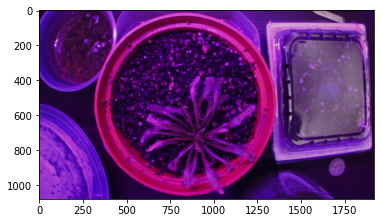

In [77]:
img = skio.imread(paths[20])
plt.imshow(img)

In [35]:
img.mean(axis=(0, 1))

array([ 91.26118586,  24.43037809, 110.38497637])

In [78]:
ds_format = "%Y%m%d%H%M"
labels = ["red", "green", "blue"]

rgb_data = []
for path in paths:
    ds = datetime.strptime(path.name.split(".")[0], ds_format).isoformat()
    img = skio.imread(path)
    res = img.mean(axis=(0, 1))
    rgb_data.append(dict(ds=ds, **dict(zip(labels, res))))

In [69]:
import pandas as pd
df = pd.DataFrame(rgb_data)
df["ds"] = pd.to_datetime(df.ds)

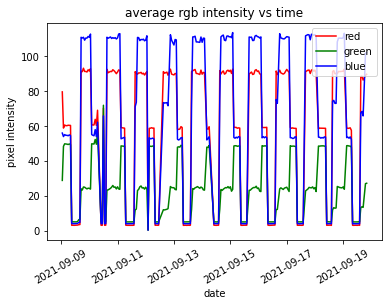

In [73]:
import matplotlib.dates as mdates

for label in labels:
    plt.plot(df.ds, df[label], label=label, c=label)
plt.title("average rgb intensity vs time")
plt.ylabel("pixel intensity")
plt.xlabel("date")
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [79]:
import imageio

data_dir = Path("../data")
images = [skio.imread(path) for path in paths]

In [80]:
imageio.mimsave(f"{data_dir}/sundew-01.gif", images)

In [118]:
! ffmpeg -y -i ../data/sundew-01.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../data/sundew-01.mp4

ffmpeg version 4.3.1-2021-01-01-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libcdio --enable-libgme --enable-libmod

# creating a gif using images with real light

In [109]:
filtered = df[(df.red < 80) & (df.red > 40) & (df.green > 40)].copy()
filtered["date"] = filtered.ds.dt.floor("d")
filtered["idx"] = filtered.index
dates = filtered.groupby("date").min()
dates

,ds,red,green,blue,idx
date,,,,,
2021-09-09,2021-09-09 02:00:00,58.826380,48.364702,53.966955,1
2021-09-10,2021-09-10 02:00:00,60.348551,49.562883,53.911211,25
2021-09-11,2021-09-11 03:00:00,58.775389,48.376225,52.686671,47
2021-09-12,2021-09-12 03:00:00,58.684889,48.275431,52.566687,69
2021-09-13,2021-09-13 03:00:00,58.070488,47.885831,52.018157,87
2021-09-14,2021-09-14 04:00:00,58.249871,47.750111,52.053134,109
2021-09-15,2021-09-15 03:00:00,58.725167,48.396982,53.027980,129
2021-09-16,2021-09-16 03:00:00,59.136800,48.486233,53.255213,152
2021-09-17,2021-09-17 03:00:00,58.642817,48.257650,52.862078,171


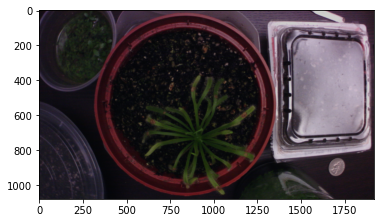

In [110]:
plt.imshow(images[dates.idx[3]])

In [358]:
subset = [images[i] for i in dates.idx]
imageio.mimsave(f"{data_dir}/sundew-02.gif", subset)

In [117]:
! ffmpeg -y -i ../data/sundew-02.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../data/sundew-02.mp4

ffmpeg version 4.3.1-2021-01-01-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libcdio --enable-libgme --enable-libmod

## cropping the image

In [280]:
def crop_circle(img, radius=520, radius_range=1):
    adapted = exposure.equalize_adapthist(img, clip_limit=0.03)
    edges = feature.canny(color.rgb2gray(adapted))

    # 720p: inner pot is around r=302, inner lid is around r=334, outerlid is r=344
    # 1080p: outerlid is r=520, depends on how the camera is handled though
    hough_radii = np.arange(radius, radius + radius_range, 1)
    hough_res = transform.hough_circle(edges, hough_radii)
    accums, cx, cy, radii = transform.hough_circle_peaks(
        hough_res, hough_radii, total_num_peaks=1
    )

    image = np.dstack((img, np.ones(img.shape[:2]).astype(np.uint8) * 255))
    mask = np.zeros(image.shape, dtype=bool)
    cyy, cxx, rr = list(zip(cy, cx, radii))[0]
    mask[draw.disk((cyy, cxx), rr, shape=image.shape)] = 1

    return (image * mask)[cyy - rr : cyy + rr, cxx - rr : cxx + rr]

def do_crop(img, **kwargs):
    # we're doing this work twice unfortunately
    cropped = crop_circle(img, radius=520, **kwargs)
    adjusted = exposure.equalize_adapthist(cropped, clip_limit=0.03)
    return crop_circle(img_as_ubyte(adjusted), radius=520)

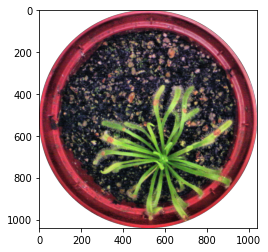

In [281]:
img = do_crop(subset[0])
plt.imshow(img)

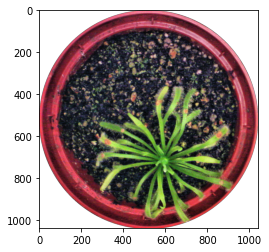

In [282]:
img = do_crop(subset[-1])
plt.imshow(img)

In [283]:
%time cropped = [do_crop(img) for img in subset]

Wall time: 3min 5s


In [284]:
imageio.mimsave(f"{data_dir}/sundew-03.gif", cropped)

In [285]:
! ffmpeg -y -i ../data/sundew-03.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../data/sundew-03.mp4

ffmpeg version 4.3.1-2021-01-01-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libcdio --enable-libgme --enable-libmod

## offsetting the image

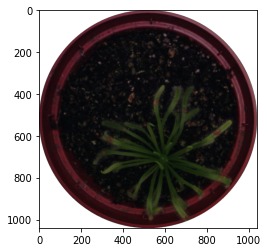

(1040, 1040, 4)

In [169]:
crop0 = crop_circle(subset[0], radius_range=10)
plt.imshow(crop0)
plt.show()
crop0.shape

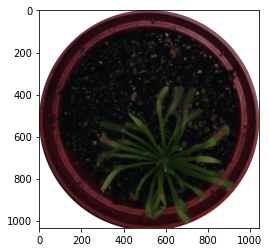

(1034, 1046, 4)

In [171]:
crop_last = crop_circle(subset[-1], radius_range=10)
plt.imshow(crop_last)
plt.show()
crop_last.shape

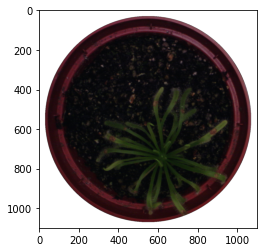

In [217]:
def add_padding(img, x=1100, y=1100):
    canvas = img_as_ubyte(np.zeros((x, y, img.shape[2])))
    w, h = img.shape[:2]
    x_off = (x-w)//2
    y_off = (y-h)//2
    canvas[x_off:x_off+w, y_off:y_off+h, :] = img
    return canvas

plt.imshow(add_padding(crop0))

C:\Users\acmiy\AppData\Local\Temp/ipykernel_5632/1073336207.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  plt.imshow(feature.canny(color.rgb2gray(add_padding(crop0))))


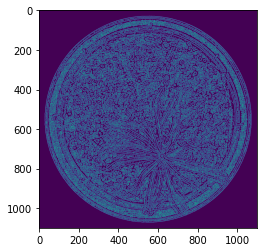

In [307]:
plt.imshow(feature.canny(color.rgb2gray(add_padding(crop0))))

In [199]:
from skimage import registration
shift, error, diffphase = registration.phase_cross_correlation(
    add_padding(crop0), 
    add_padding(crop_last)
)
print(shift)

[-3. -1.  0.]


In [286]:
def do_crop_norm(img):
    # we're doing this work twice unfortunately
    cropped = crop_circle(img, radius=520, radius_range=10)
    adjusted = exposure.equalize_adapthist(cropped, clip_limit=0.03)
    return adjusted

%time adjusted = [do_crop_norm(img) for img in subset]

Wall time: 17min 51s


In [287]:
[x.shape for x in adjusted]

[(1040, 1040, 3),
 (1040, 1040, 3),
 (1040, 1040, 3),
 (1040, 1040, 3),
 (1040, 1040, 3),
 (1040, 1040, 3),
 (1039, 1056, 3),
 (1039, 1056, 3),
 (1051, 1058, 3),
 (1036, 1042, 3),
 (1038, 1056, 3)]

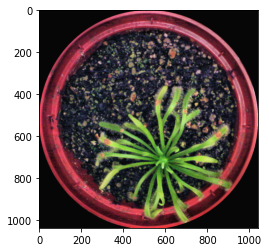

In [288]:
plt.imshow(adjusted[-2])

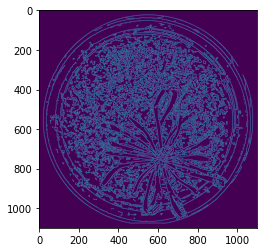

In [324]:
edge = lambda x: feature.canny(color.rgb2gray(add_padding(x)))
plt.imshow(edge(adjusted[-3]))

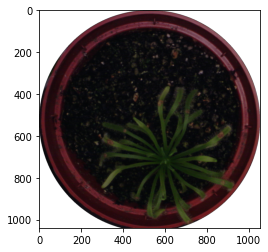

In [289]:
plt.imshow(crop_circle(subset[7], radius=520, radius_range=15))

0.0 0.0
-2.0 -7.0


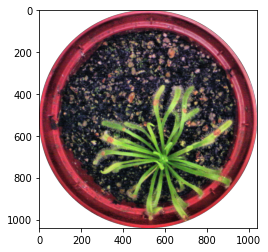

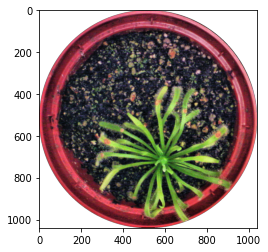

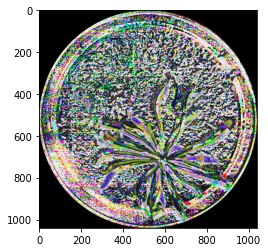

In [378]:
def add_padding(img, x=1100, y=1100):
    canvas = np.zeros((x, y, img.shape[2]))
    h, w = img.shape[:2]
    x_off = (x-w)//2
    y_off = (y-h)//2
    canvas[y_off:y_off+h, x_off:x_off+w, :] = img
    return canvas

def do_matched_crop(img, ref):
    # assume our images are going to be roughtly the same size
    # hardcoding is bad though
    # https://scikit-image.org/docs/dev/auto_examples/registration/plot_register_translation.html#sphx-glr-auto-examples-registration-plot-register-translation-py   
    pad = 1100
    c = pad//2
    r = 520
    # resize?
#     if img.shape[1] > 1040:
#         img = transform.rescale(img, 1040/img.shape[1])
    img_pad = add_padding(img, pad, pad)
    ref_pad = add_padding(ref, pad, pad)
    edge = lambda x: feature.canny(color.rgb2gray(add_padding(x)))
    (y, x), error, diffphase = registration.phase_cross_correlation(edge(ref_pad), edge(img_pad))
    # y, x = y/2, x/2
    print(y, x)
    # return img_pad[int(c-r+x):int(c+r+x), int(c-r+y):int(c+r+y), :]
    
    image = np.dstack((img_as_ubyte(img_pad), np.ones(img_pad.shape[:2]).astype(np.uint8) * 255))
    mask = np.zeros(image.shape, dtype=bool)
    mask[draw.disk((c-y, c-x), r, shape=image.shape)] = 1

    return (image * mask)[int(c-r-y):int(c+r-y), int(c-r-x):int(c+r-x), :]

img = do_matched_crop(adjusted[0], adjusted[0])
off = do_matched_crop(adjusted[-1], adjusted[0])
plt.imshow(img)
plt.show()
plt.imshow(off)
plt.show()
plt.imshow(img[:,:,:3] - off[:,:,:3])

In [375]:
%time shifted = [do_matched_crop(img, adjusted[0]) for img in adjusted]

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
-8.0 0.0
-8.0 0.0
-3.0 0.0
-3.0 0.0
-9.0 0.0
Wall time: 16.9 s


In [376]:
imageio.mimsave(f"{data_dir}/sundew-04.gif", shifted)

In [362]:
! ffmpeg -y -i ../data/sundew-04.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../data/sundew-04.mp4

ffmpeg version 4.3.1-2021-01-01-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libcdio --enable-libgme --enable-libmod

In [356]:
# https://github.com/xjcl/hugbot/blob/3bdd2d334281bdc7f6e41881cb92031604758bbe/hugify.py#L154
# https://stackoverflow.com/a/51219787
from PIL import Image

# # https://stackoverflow.com/a/51219787
def convert_frame(img):
    im = Image.fromarray(img)
    alpha = im.getchannel('A')
    # Convert the image into P mode but only use 255 colors in the palette out of 256
    im = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=255)
    # Set all pixel values below 128 to 255 , and the rest to 0
    mask = Image.eval(alpha, lambda a: 255 if a <=128 else 0)
    # Paste the color of index 255 and use alpha as a mask
    im.paste(255, mask)
    # The transparency index is 255
    im.info['transparency'] = 255
    return im

convert_frame(shifted[0]).save(
    f"{data_dir}/sundew-05.gif", 
    save_all=True, 
    append_images=[convert_frame(x) for x in shifted[1:]],
    loop=0
)

In [357]:
! ffmpeg -y -i ../data/sundew-05.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../data/sundew-05.mp4

ffmpeg version 4.3.1-2021-01-01-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libcdio --enable-libgme --enable-libmod

In [379]:
! cp ../data/sundew-05.mp4 04-sundew-timelapse.mp4

# appendix

## improving cropping

Some images, the cropping doesnt work well...

In [268]:
def crop_circle(img, radius=520, radius_range=1):
    adapted = exposure.equalize_adapthist(img, clip_limit=0.03)
    edges = feature.canny(color.rgb2gray(adapted))

    # 720p: inner pot is around r=302, inner lid is around r=334, outerlid is r=344
    # 1080p: outerlid is r=520, depends on how the camera is handled though
    hough_radii = np.arange(radius, radius + radius_range, 1)
    hough_res = transform.hough_circle(edges, hough_radii)
    accums, cx, cy, radii = transform.hough_circle_peaks(
        hough_res, hough_radii, total_num_peaks=1
    )

    image = np.dstack((img, np.ones(img.shape[:2]).astype(np.uint8) * 255))
    mask = np.zeros(image.shape, dtype=bool)
    cyy, cxx, rr = list(zip(cy, cx, radii))[0]
    mask[draw.disk((cyy, cxx), rr, shape=image.shape)] = 1

    return (image * mask)[cyy - rr : cyy + rr, cxx - rr : cxx + rr]

def do_crop(img, **kwargs):
    # we're doing this work twice unfortunately
    cropped = crop_circle(img, radius=520, **kwargs)
    adjusted = exposure.equalize_adapthist(cropped, clip_limit=0.03)
    return crop_circle(img_as_ubyte(adjusted), radius=520)

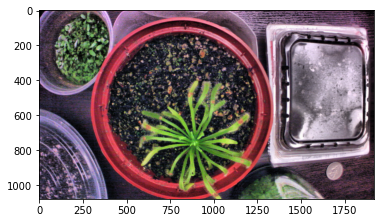

In [272]:
plt.imshow(exposure.equalize_adapthist(subset[7], clip_limit=0.03))

(1039, 1056, 4)

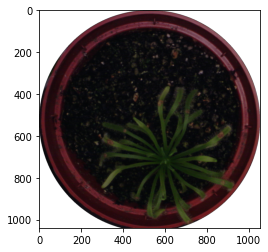

In [273]:
res = crop_circle(subset[7], radius=520, radius_range=10)
plt.imshow(res)
res.shape

## attempting template matching to get offsets

In [129]:
crop0 = do_crop(subset[0])
misaligned = subset[-1]

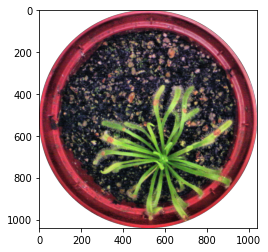

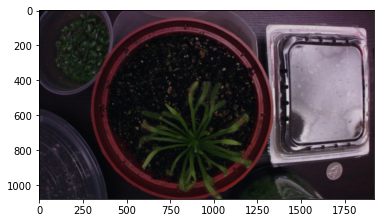

In [130]:
plt.imshow(crop0)
plt.show()
plt.imshow(misaligned)
plt.show()

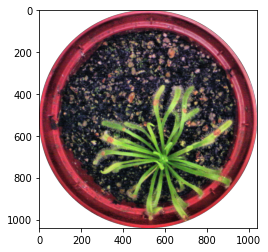

In [151]:
plt.imshow(crop0)

In [152]:
# template = crop0[:crop0.shape[0]//2, :, :3]
template = crop0[:, :, :3]

In [153]:
%time res = feature.match_template(misaligned, template)

Wall time: 59.2 s


In [157]:
ij = np.unravel_index(np.argmax(res), res.shape)
x, y, _ = ij[::-1]

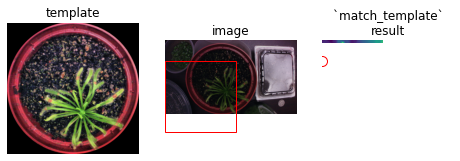

In [159]:
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(misaligned, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h, w, _ = template.shape
rect = plt.Rectangle((x, y), h, w, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(res)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()